In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
file_path = '/content/Bangkok Housing Condo Apartment Prices.csv' # Example path after mounting Drive

In [25]:
import pandas as pd
df = pd.read_csv(file_path)


In [26]:
# Handle Missing Data
df.dropna(inplace=True)  # Drop rows with missing values


In [27]:
# Outlier Detection & Removal (Using IQR Method)
Q1 = df["Price (THB)"].quantile(0.25)
Q3 = df["Price (THB)"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["Price (THB)"] >= (Q1 - 1.5 * IQR)) & (df["Price (THB)"] <= (Q3 + 1.5 * IQR))]


In [28]:
df["Price per sq. ft."] = df["Price (THB)"] / df["Area (sq. ft.)"]


In [29]:
# Show basic info and preview
df_info = df.info()
df_head = df.head()
df_describe = df.describe()

df_info, df_head, df_describe

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 0 to 562
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Property Type      539 non-null    object 
 1   Location           539 non-null    object 
 2   Area (sq. ft.)     539 non-null    int64  
 3   Bedrooms           539 non-null    int64  
 4   Bathrooms          539 non-null    int64  
 5   Price (THB)        539 non-null    int64  
 6   Price per sq. ft.  539 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 33.7+ KB


(None,
   Property Type   Location  Area (sq. ft.)  Bedrooms  Bathrooms  Price (THB)  \
 0         Condo  Sukhumvit             700         1          1      2000000   
 1         House    Ladprao            1500         3          2      5000000   
 2     Apartment       Siam             900         2          1      3500000   
 3         Condo    Sathorn            1200         2          2      4500000   
 4         House   Ratchada            1800         4          3      8000000   
 
    Price per sq. ft.  
 0        2857.142857  
 1        3333.333333  
 2        3888.888889  
 3        3750.000000  
 4        4444.444444  ,
        Area (sq. ft.)    Bedrooms   Bathrooms   Price (THB)  Price per sq. ft.
 count      539.000000  539.000000  539.000000  5.390000e+02         539.000000
 mean       886.048237    2.198516    1.719852  3.731354e+06        5717.479423
 std        505.477217    1.129002    0.818805  2.232582e+06        7366.447712
 min         10.000000    1.000000    1.

In [30]:
# Grouping by Property Type and Location to get average prices and areas
property_stats = df.groupby("Property Type")["Price (THB)"].mean().sort_values(ascending=False)
location_stats = df.groupby("Location")["Price (THB)"].mean().sort_values(ascending=False)

# Correlation check to see how features relate to price
correlation = df.corr(numeric_only=True)["Price (THB)"].sort_values(ascending=False)

property_stats, location_stats, correlation


(Property Type
 House        6.392169e+06
 Condo        3.175758e+06
 Apartment    1.836000e+06
 Name: Price (THB), dtype: float64,
 Location
 Sathorn        6.407692e+06
 Phrom Phong    5.065455e+06
 Ekkamai        4.830769e+06
 Ratchada       4.021277e+06
 Siam           3.879032e+06
 Thonglor       3.648936e+06
 Ladprao        3.390476e+06
 Ari            2.592727e+06
 Silom          2.232759e+06
 Sukhumvit      2.037705e+06
 Name: Price (THB), dtype: float64,
 Price (THB)          1.000000
 Area (sq. ft.)       0.895075
 Bedrooms             0.893567
 Bathrooms            0.872235
 Price per sq. ft.   -0.166061
 Name: Price (THB), dtype: float64)

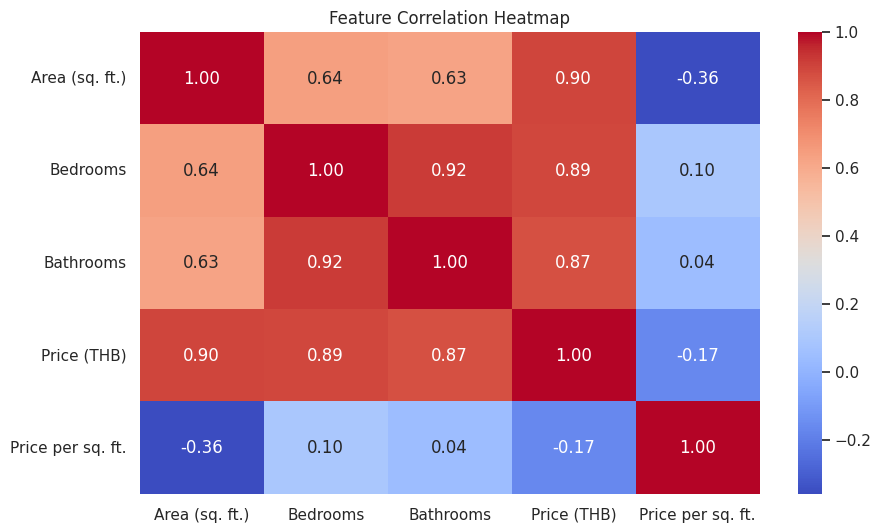

<ipython-input-31-a591387c3218>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_stats.index, y=property_stats.values, palette="pastel")


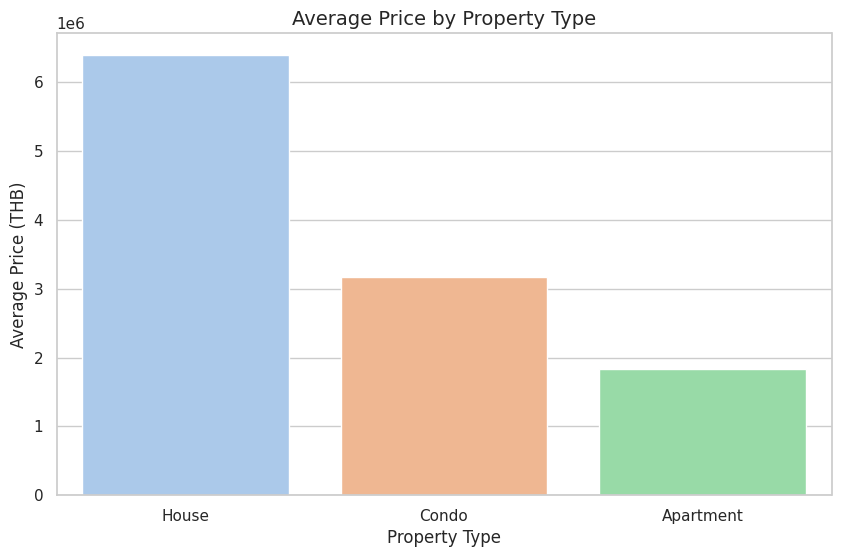

<ipython-input-31-a591387c3218>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_stats.values, y=location_stats.index, palette="muted")


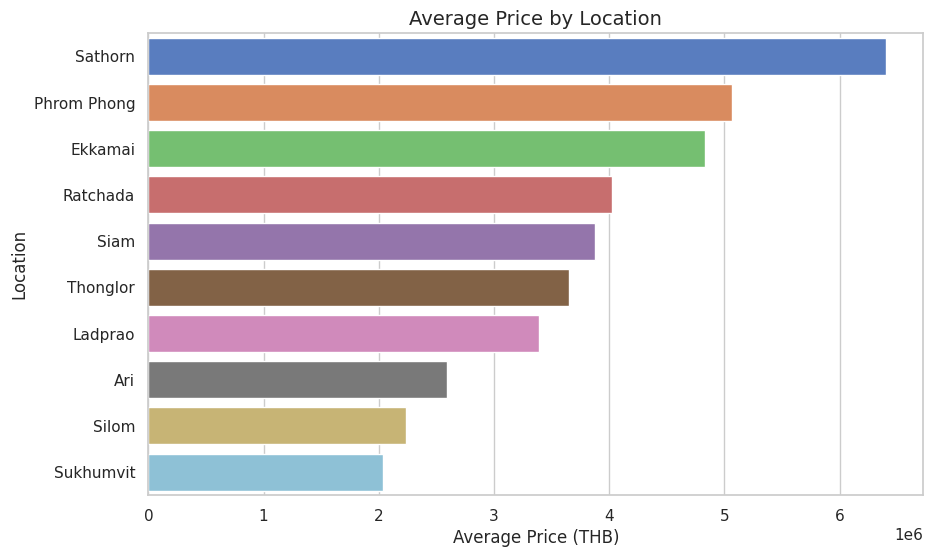

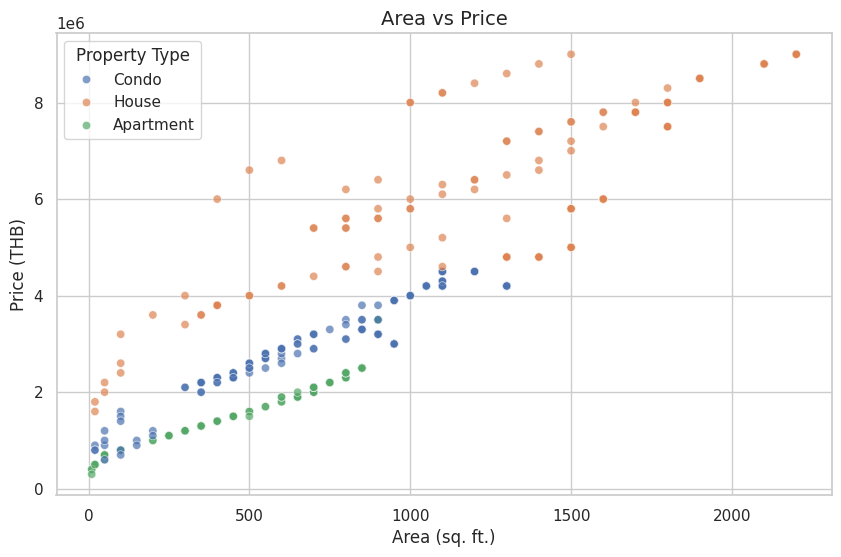

<ipython-input-31-a591387c3218>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Bedrooms", y="Price (THB)", palette="coolwarm")


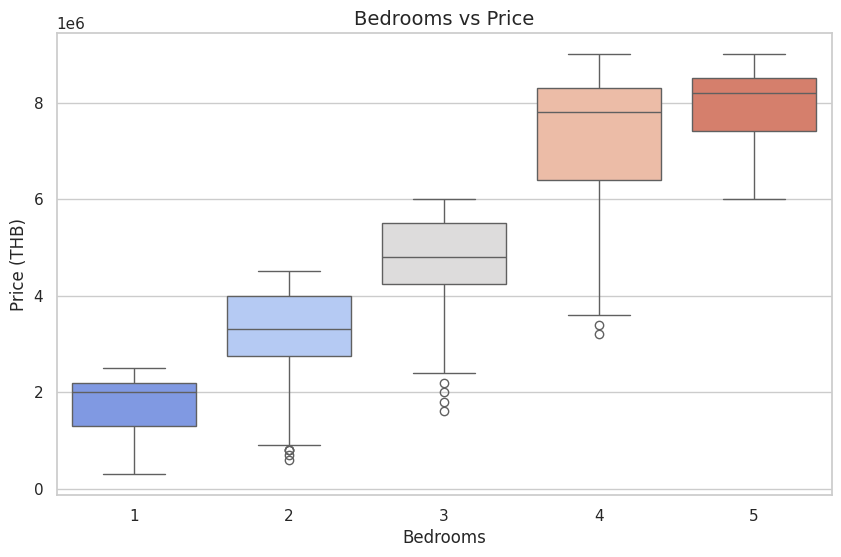

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Price by Property Type
plt.figure(figsize=(10, 6))  # Create a new figure
sns.barplot(x=property_stats.index, y=property_stats.values, palette="pastel")
plt.title("Average Price by Property Type", fontsize=14)
plt.ylabel("Average Price (THB)")
plt.show()  # Display this plot

# Price by Location
plt.figure(figsize=(10, 6))  # Create a new figure
sns.barplot(x=location_stats.values, y=location_stats.index, palette="muted")
plt.title("Average Price by Location", fontsize=14)
plt.xlabel("Average Price (THB)")
plt.show()  # Display this plot

# Area vs Price
plt.figure(figsize=(10, 6))  # Create a new figure
sns.scatterplot(data=df, x="Area (sq. ft.)", y="Price (THB)", hue="Property Type", alpha=0.7)
plt.title("Area vs Price", fontsize=14)
plt.show()  # Display this plot

# Bedrooms vs Price
plt.figure(figsize=(10, 6))  # Create a new figure
sns.boxplot(data=df, x="Bedrooms", y="Price (THB)", palette="coolwarm")
plt.title("Bedrooms vs Price", fontsize=14)
plt.show()  # Display this plot

<ipython-input-32-66e7cfade6d5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Property Type", y="Price per sq. ft.", palette="pastel", ax=axes[0, 0])
<ipython-input-32-66e7cfade6d5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y="Location", x="Price per sq. ft.", palette="muted", ax=axes[0, 1])
<ipython-input-32-66e7cfade6d5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Bathrooms", y="Price (THB)", palette="coolwarm", ax=axes[1, 0])


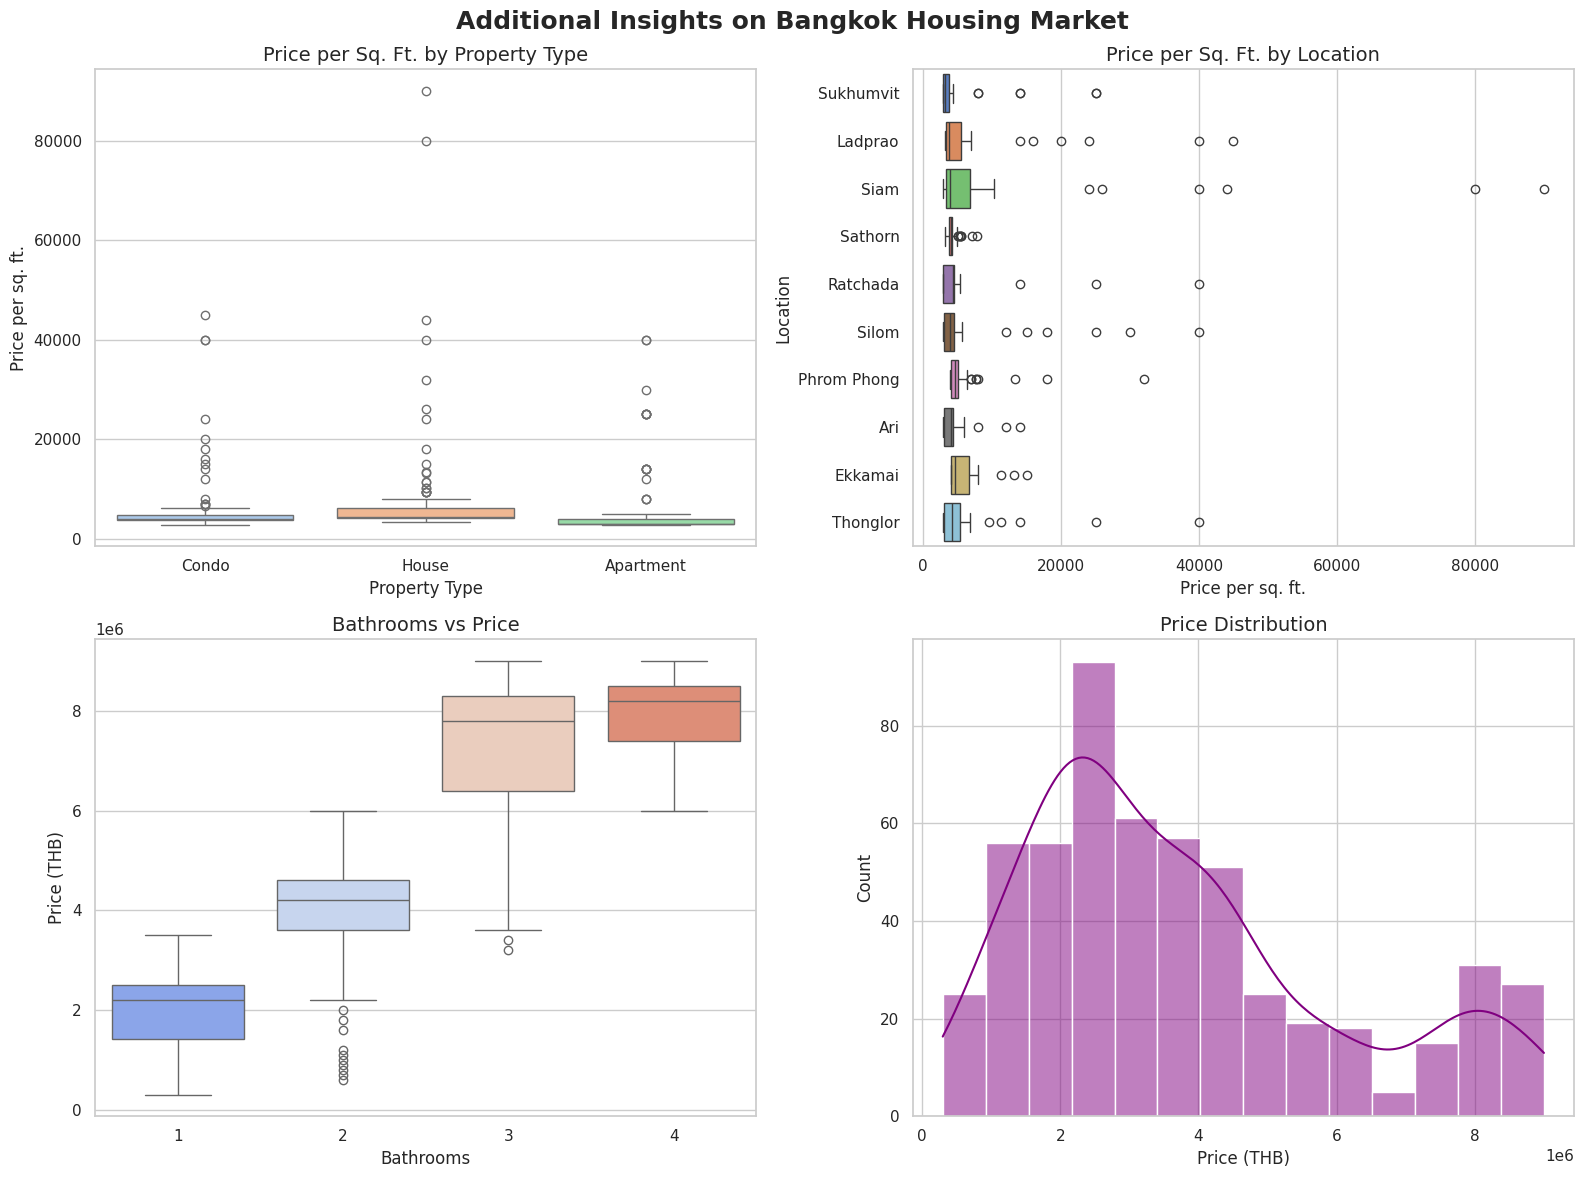

In [32]:
# Calculate price per square foot
df["Price per sq. ft."] = df["Price (THB)"] / df["Area (sq. ft.)"]

# Set up plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Additional Insights on Bangkok Housing Market", fontsize=18, weight='bold')

# Price per sq. ft. by Property Type
sns.boxplot(data=df, x="Property Type", y="Price per sq. ft.", palette="pastel", ax=axes[0, 0])
axes[0, 0].set_title("Price per Sq. Ft. by Property Type", fontsize=14)

# Price per sq. ft. by Location
sns.boxplot(data=df, y="Location", x="Price per sq. ft.", palette="muted", ax=axes[0, 1])
axes[0, 1].set_title("Price per Sq. Ft. by Location", fontsize=14)

# Bathrooms vs Price
sns.boxplot(data=df, x="Bathrooms", y="Price (THB)", palette="coolwarm", ax=axes[1, 0])
axes[1, 0].set_title("Bathrooms vs Price", fontsize=14)

# Price Distribution
sns.histplot(df["Price (THB)"], kde=True, color="purple", ax=axes[1, 1])
axes[1, 1].set_title("Price Distribution", fontsize=14)
axes[1, 1].set_xlabel("Price (THB)")

plt.tight_layout()
plt.show()



In [33]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encode categorical variables
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_features = encoder.fit_transform(df[["Property Type", "Location"]])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["Property Type", "Location"]))

# Combine with original dataset
df = df.drop(["Property Type", "Location"], axis=1).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)


In [34]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid Search with Cross-Validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimized Model Performance:\n MAE = {mae:.2f}, MSE = {mse:.2f}, R² = {r2:.2f}")
print(f"Best Parameters: {grid_search.best_params_}")


Optimized Model Performance:
 MAE = 131528.50, MSE = 63531037336.04, R² = 0.99
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [35]:
importances = best_model.feature_importances_
feature_names = X.columns

# Sort and display
sorted_indices = importances.argsort()[::-1]
for i in sorted_indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")


Area (sq. ft.): 0.4090
Bedrooms: 0.3788
Bathrooms: 0.2122


In [37]:
import pandas as pd

# Sample input data
input_data = pd.DataFrame([[1200, 3, 2]], columns=["Area (sq. ft.)", "Bedrooms", "Bathrooms"])

# Predict using the trained model
predicted_price = model.predict(input_data)

# Display the predicted price
print(f"Predicted Price: {predicted_price[0]:.2f} THB")


Predicted Price: 4908149.21 THB
